
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 3: Polynomial Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_3/Session_3_Regularization_and_Poly_regression_EXERCISE.ipynb)

**Resources:**
* Auréliene Géron, Hands On ML with SKlearn, Keras and TF

# Regression with regularization

#### We will using the Boston Housing Dataset available in sklearn and we will extend it with  5 additional features of random noise to test each algorithm’s ability to filter out irrelevant information:

- **Examine the results of applying Linear Regression, Lasso Regression, Ridge Regression and Elastic Net on the features scores**
- **Try to modify the hyperparameters lambda and describe how it affects the parmeter scores**

This is the very same exercise that we did in class, try to go in depth into the tradeoffs of lambda (alpha) and others

### Import libraries and dataset from sklearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Add Noise to original dataset

In [2]:
n_houses = boston_df.shape[0]
rand_noise = np.random.rand(n_houses, 5)

rand_noise_df = pd.DataFrame(data=rand_noise, columns=['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5'])
X = pd.concat([boston_df, rand_noise_df], axis=1)
y = boston['target'] # MEDV of the price of a home


In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Noise_1,Noise_2,Noise_3,Noise_4,Noise_5
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.030193,0.703710,0.293560,0.996864,0.454144
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.759496,0.796370,0.310438,0.824796,0.624633
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.888251,0.760825,0.552627,0.673654,0.906754
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.276336,0.047306,0.444870,0.171800,0.156723
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.695061,0.151657,0.201400,0.092326,0.411483


In [4]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Implement classical linear regression, Lasso, Ridge and ElasticNet (use the default parameter of sklearn) and describe how the scores of the features change

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# CREATE MODEL INSTANCES

lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elastic_net = ElasticNet()

models = [(lin_reg, "Linear Regression"), (lasso, "Lasso"), (ridge, "Ridge"), (elastic_net, "Elastic Net")]


##### NORMALIZE DATA USING THE ```StandardScaler``` PROVIDED BY sklearn

In [13]:
from sklearn.preprocessing import StandardScaler

boston_ss = StandardScaler()
X_scaled = boston_ss.fit_transform(X=X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=235)

In [14]:

X.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Noise_1', 'Noise_2', 'Noise_3', 'Noise_4',
       'Noise_5'],
      dtype='object')

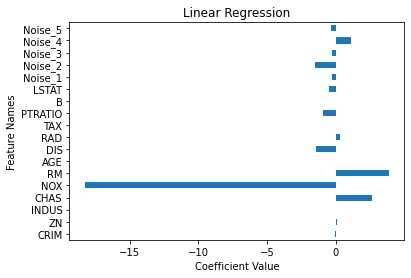

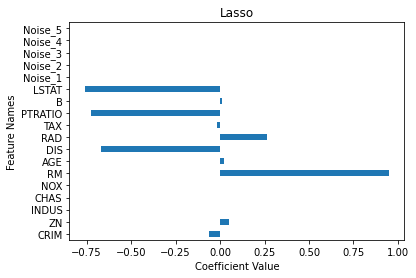

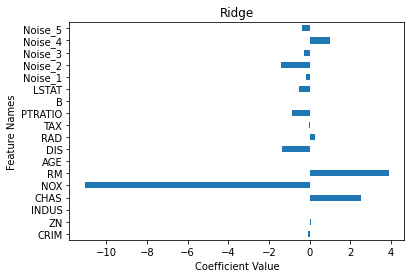

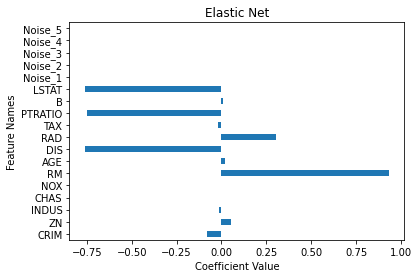

,Features Names,Linear Regression,Lasso,Ridge,Elastic Net
0,CRIM,-0.104770,-0.063437,-0.101371,-0.080371
1,ZN,0.044636,0.049165,0.045749,0.053240
2,INDUS,0.027370,-0.000000,-0.002975,-0.012657
3,CHAS,2.635163,0.000000,2.498323,0.000000
4,NOX,-18.269316,-0.000000,-11.051235,-0.000000
5,RM,3.855390,0.949811,3.897775,0.933936
6,AGE,0.001420,0.020910,-0.004966,0.020579
7,DIS,-1.480012,-0.668790,-1.374054,-0.762044
8,RAD,0.297181,0.264206,0.281764,0.301569
9,TAX,-0.012146,-0.015212,-0.012765,-0.016439


In [18]:
## FITTING OF THE MODELS AND RESULTS
df = pd.DataFrame()
df['Features Names'] = X.columns

for model in models:
  model[0].fit(X, y)
  pd.Series(model[0].coef_, index=X.columns).plot(kind='barh')
  plt.title(model[1])
  plt.xlabel("Coefficient Value")
  plt.ylabel("Feature Names")
  plt.show()

  column_name = model[1]
  df[f'{column_name}'] = model[0].coef_

df

#### Decribe the results

- We can see that linear regression assigned non-zero values to all 5 of our noise features, despite none of them having any predictive power. Interestingly, these noise features have coefficients with magnitudes similar to some of the real features in the dataset.
- As we hoped, Lasso did a good job of reducing all 5 of our noise features to 0, as well as many of the real features from the dataset. This is indeed a much simpler model than given by linear regression
- Ridge Regression makes a similar mistake that unregularized linear regression, assigning coefficient values to our noise features. We also see some features have very small coefficients.
- Much like Lasso, Elastic Net makes the coefficients of several features 0. It however does not make as many coefficients 0 as Lasso does.

### Compute the Model Scores

In [20]:
# PUT YOUR CODE HERE

for model in models:
  y_pred = model[0].predict(X_test)
  print(f"Mean Squared Error Of {model[1]}", mean_squared_error(y_test, y_pred))

  

Mean Squared Error Of Linear Regression 408.1049203886291
Mean Squared Error Of Lasso 426.86797732898737
Mean Squared Error Of Ridge 161.61679331293297
Mean Squared Error Of Elastic Net 474.43529196348373


This might seem counter-intuitive, but it is important to remember the ridge regression model traded some variance for bias, which ultimately lead to an overall smaller error. The Lasso and Elastic Net models traded a significant amount of variance for bias, and we see that our error has increased.
Interestingly, Lasso and Elastic Net had a higher MSE than Linear Regression. But does that mean that these models are unequivocally worse? I would argue not, as the Lasso and Elastic Net models also performed feature selection, which gives us better interpretability of the models. Coefficients are interpreted as the change in dependent variable with a one unit increase in predictor value, with all other predictors held constant. In the case of complex models, the assumption of holding all other predictors constant cannot reasonably be met.

### Alpha parameter:  Apply Lasso with different values of alpha and describe how the parameters scores change


- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

In [25]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Noise_1', 'Noise_2', 'Noise_3', 'Noise_4',
       'Noise_5'],
      dtype='object')

In [35]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]
names = X.columns

# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df_alphas = pd.DataFrame()
    
    # Create a column of feature names
    df_alphas['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,

        # ********************************************************
        lasso = Lasso(alpha=alpha)          # ********************************************************
        # ********************************************************
        
        # Fit the lasso regression
        lasso.fit(X_scaled, y)

        # Create a column of coefficient values
        df_alphas[f"Alpha = {alpha}"] = lasso.coef_
        
    # Return the dataframe  
    return df_alphas



In [36]:
lasso([0, .0001, .5, 10])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5459.728688695681, tolerance: 4.2716295415019765
  positive)


,Feature Name,Alpha = 0,Alpha = 0.0001,Alpha = 0.5,Alpha = 10
0,CRIM,-0.900296,-0.900023,-0.115265,-0.0
1,ZN,1.039995,1.039534,0.000000,0.0
2,INDUS,0.187585,0.186644,-0.000000,-0.0
3,CHAS,0.668654,0.668690,0.397079,0.0
4,NOX,-2.114913,-2.114054,-0.000000,-0.0
5,RM,2.706185,2.706338,2.974259,0.0
6,AGE,0.039926,0.039476,-0.000000,-0.0
7,DIS,-3.113394,-3.113017,-0.170569,0.0
8,RAD,2.585072,2.583255,-0.000000,-0.0
9,TAX,-2.045103,-2.043335,-0.000000,-0.0


#### Describe the above results

It is clear that as you increase the value of the alpha parameter you increase the size of the penalty that the lasso model applies to the cost function.

Alpha = 0, lasso applies no penalty
Aplha = 10, lasso applies a very large penalty and all the coefficients are reduced to zero

In this case, aplha = 0.5 makes the most sense and applies a reasonable penalty to the cost function in order to regularize the coefficients

### Apply Ridge with different values of alpha and describe how the parameters scores change
- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

In [37]:
names = X.columns
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]


# Create a function called lasso,
def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of ridge regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a Ridge regression with that alpha value,
        
        #********************************************************
        ridge = Ridge(alpha=alpha) # ********************************************************
        #********************************************************
        
        # Fit the lasso regression
        ridge.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = ridge.coef_
        
    # Return the dataframe  
    return df

In [38]:
ridge(alphas)

,Feature Name,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.010000,Alpha = 0.100000,Alpha = 0.500000,Alpha = 1.000000,Alpha = 10.000000
0,CRIM,-0.900295,-0.900288,-0.900214,-0.899477,-0.896239,-0.892275,-0.833580
1,ZN,1.039993,1.039980,1.039844,1.038493,1.032554,1.025279,0.916898
2,INDUS,0.187583,0.187561,0.187341,0.185153,0.175581,0.163956,0.003838
3,CHAS,0.668654,0.668658,0.668690,0.669009,0.670404,0.672098,0.695304
4,NOX,-2.114910,-2.114884,-2.114628,-2.112070,-2.100782,-2.086862,-1.867133
5,RM,2.706186,2.706193,2.706269,2.707029,2.710359,2.714419,2.771498
6,AGE,0.039925,0.039919,0.039861,0.039278,0.036718,0.033589,-0.012147
7,DIS,-3.113392,-3.113367,-3.113126,-3.110716,-3.100048,-3.086816,-2.866894
8,RAD,2.585065,2.585000,2.584355,2.577921,2.549733,2.515405,2.029831
9,TAX,-2.045096,-2.045036,-2.044429,-2.038384,-2.011953,-1.979886,-1.542697


In practice, we will not manually look for the best alpha coefficient. Both in Lasso and ridge regression, the alpha is a hyperparameter. Therefore, we will find the best one via crossvalidation. Fortunately, sklearn has a function that performs CV to find the optimal alpha automatically. 

In [43]:
from sklearn.linear_model import LassoCV
reg = LassoCV(max_iter=3000, cv=30, normalize=True).fit(X, y)
reg.alpha_

0.0016079659218534862